In [2]:
%reload_ext autoreload
%autoreload 2
from t_test_auto import df_builder, barh_plotter, league_ttest, dist_plotter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Populating dataframes for each league and features

In [3]:
# Names of European Leagues under consideration for 8 seasons (2008-2016)

league_names = ['Netherlands Eredivisie', 'Scotland Premier League', 'Poland Ekstraklasa', 
                'Portugal Liga ZON Sagres','England Premier League', 'Germany 1. Bundesliga', 
                'Italy Serie A', 'Switzerland Super League','Spain LIGA BBVA', 
                'France Ligue 1', 'Belgium Jupiler League']

In [4]:
# League_tables for square root goal difference
# European league teams total absolute goal difference  for 8 seasons (2008-2016)
league_sqrt_goldif = {}

for name in league_names:
    league_sqrt_goldif[name] = df_builder('SQRT(SUM(POW(gol_dif, 2)))', 
                                              'sqrt_gol_dif', name)

# League_tables for total goal
# European league teams total goal for 8 seasons (2008-2016)
league_total_goal = {}

for name in league_names:
    league_total_goal[name] = df_builder('SUM(gol_for)', 'total_gol', name)
    
# League_tables for draw percent
# European league teams total goal for 8 seasons (2008-2016)
league_draw_percent = {}

for name in league_names:
    league_draw_percent[name] = df_builder('ROUND(SUM(CAST(draws AS NUMERIC))/SUM(draws + win + loss), 4)',
                                                       'draw_percent', name)
    
#  league_tables for win percent
#  European league teams total goal for 8 seasons (2008-2016)
league_win_percent = {}

for name in league_names:
    league_win_percent[name] = df_builder('ROUND(SUM(CAST(win AS NUMERIC))/SUM(draws + win + loss), 4)',
                                                       'win_percent', name)
    

#  league_tables for win percent
#  European league teams total goal for 8 seasons (2008-2016)
league_loss_percent = {}

for name in league_names:
    league_loss_percent[name] = df_builder('ROUND(SUM(CAST(loss AS NUMERIC))/SUM(draws + win + loss), 4)',
                                                       'loss_percent', name)



In [5]:
#Only 3 records of Italian league are shown here for brevity

league_loss_percent['Italy Serie A'].iloc[:3]

,club,loss_percent
0,Pescara,0.7368
1,Livorno,0.6316
2,Frosinone,0.6053


,club,loss_percent
0,Pescara,0.7368
1,Livorno,0.6316
2,Frosinone,0.6053


### Conducting Multiple One-tailed t-tests

In [6]:
# comparing England Premier League draw percent with other leagues

epl_draw = league_draw_percent['England Premier League']

draw_ttest = {}

for league_name, df in league_draw_percent.items():
    
    draw_ttest[league_name] = league_ttest(epl_draw, df,'draw_percent', 0.05)

for key, val in draw_ttest.items():
    if val != 'Not enough evidence to reject null hypothesis':
        print(f'{key}:', val)


Netherlands Eredivisie: Enough evidence to reject null hypothesis
Poland Ekstraklasa: Enough evidence to reject null hypothesis
Spain LIGA BBVA: Enough evidence to reject null hypothesis
France Ligue 1: Enough evidence to reject null hypothesis
Netherlands Eredivisie: Enough evidence to reject null hypothesis
Poland Ekstraklasa: Enough evidence to reject null hypothesis
Spain LIGA BBVA: Enough evidence to reject null hypothesis
France Ligue 1: Enough evidence to reject null hypothesis


In [7]:
# comparing England Premier League win percent with other leagues

epl_win = league_win_percent['England Premier League']

win_ttest = {}

for league_name, df in league_win_percent.items():
    
    win_ttest[league_name] = league_ttest(epl_win, df,'win_percent', 0.05)
    
for key, val in win_ttest.items():
    if val != 'Not enough evidence to reject null hypothesis':
        print(f'{key}:', val)

In [8]:
# comparing England Premier League sqrt goal difference  with other leagues

epl_sqrt_goldif = league_sqrt_goldif['England Premier League']

sqrt_goldif_ttest = {}

for league_name, df in league_sqrt_goldif.items():
    
    sqrt_goldif_ttest[league_name] = league_ttest(epl_sqrt_goldif, df,'sqrt_gol_dif', 0.05)
    
for key, val in sqrt_goldif_ttest.items():
    if val != 'Not enough evidence to reject null hypothesis':
        print(f'{key}:', val)

Poland Ekstraklasa: Enough evidence to reject null hypothesis
France Ligue 1: Enough evidence to reject null hypothesis
Belgium Jupiler League: Enough evidence to reject null hypothesis
Poland Ekstraklasa: Enough evidence to reject null hypothesis
France Ligue 1: Enough evidence to reject null hypothesis
Belgium Jupiler League: Enough evidence to reject null hypothesis


In [9]:
# comparing England Premier League loss percent with other leagues

epl_loss= league_loss_percent['England Premier League']

loss_ttest = {}

for league_name, df in league_loss_percent.items():
    
    loss_ttest[league_name] = league_ttest(epl_loss, df,'loss_percent', 0.05)  

for key, val in loss_ttest.items():
    if val != 'Not enough evidence to reject null hypothesis':
        print(f'{key}:', val)


Poland Ekstraklasa: Enough evidence to reject null hypothesis
Poland Ekstraklasa: Enough evidence to reject null hypothesis


In [10]:
# comparing England Premier League total goals with other leagues

epl_total = league_total_goal['England Premier League']

total_ttest = {}

for league_name, df in league_total_goal.items():
    
    total_ttest[league_name] = league_ttest(epl_total, df,'total_gol', 0.05)  

for key, val in total_ttest.items():
    if val != 'Not enough evidence to reject null hypothesis':
        print(f'{key}:', val)


Portugal Liga ZON Sagres: Enough evidence to reject null hypothesis
Portugal Liga ZON Sagres: Enough evidence to reject null hypothesis


### Relevant plots which are statstically relevant

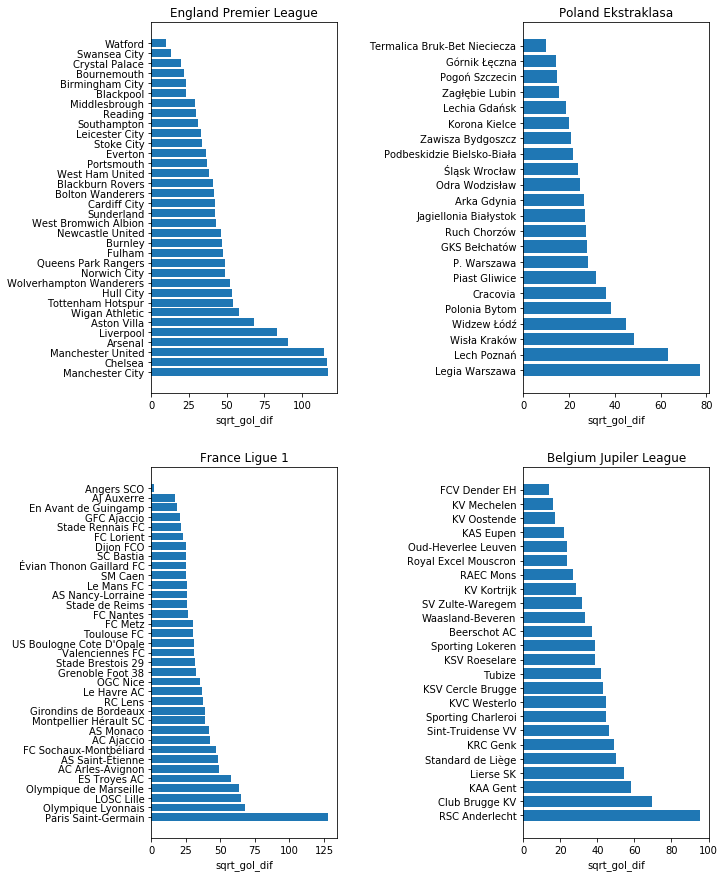

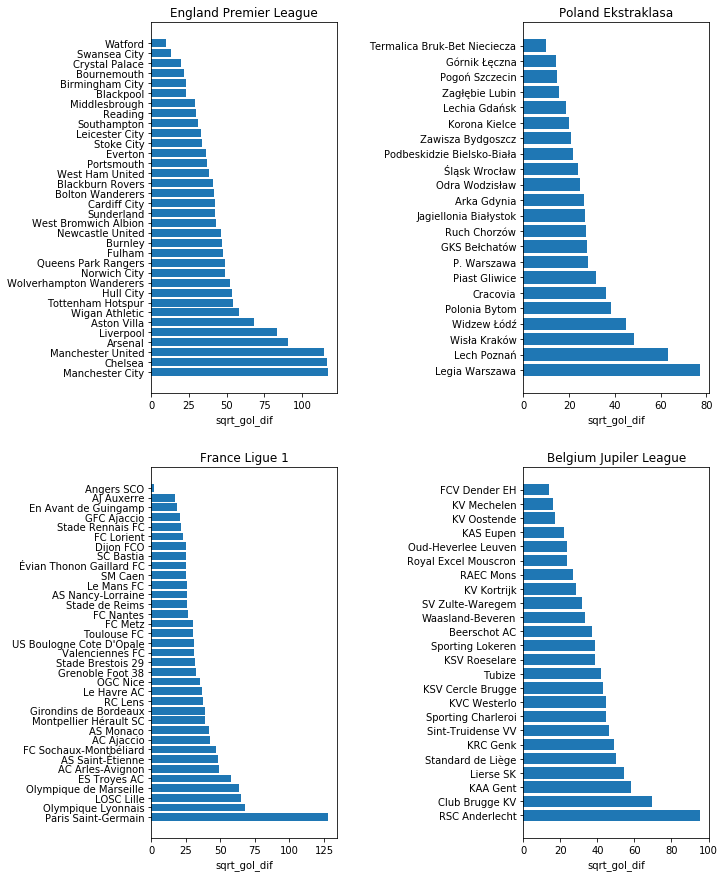

In [11]:
#subsetting our dictionary for plotting total goal difference which are signficantly different from EPL

sqrt_goldif_keys = ['England Premier League', 'Poland Ekstraklasa', 'France Ligue 1','Belgium Jupiler League'] 

league_sqrt_goldif = {}

for name in sqrt_goldif_keys:
    league_sqrt_goldif[name] = df_builder('SQRT(SUM(POW(gol_dif, 2)))', 
                                              'sqrt_gol_dif', name)

fig, axs = plt.subplots(2, 2, gridspec_kw={'wspace': 1}, figsize=(10, 15), sharex = False)



for ax, data in zip(axs.flatten(), league_sqrt_goldif.values()):
    ax.barh(data['club'], data['sqrt_gol_dif'])
#     ax.set_xlim(0, 0.38)
    
for ax, name in zip(axs.flatten(), league_sqrt_goldif.keys()):
    ax.set_title(f'{name}')
    ax.set_xlabel('sqrt_gol_dif')

plt.savefig('SQRT_GOAL_DIFFERENCE.png')



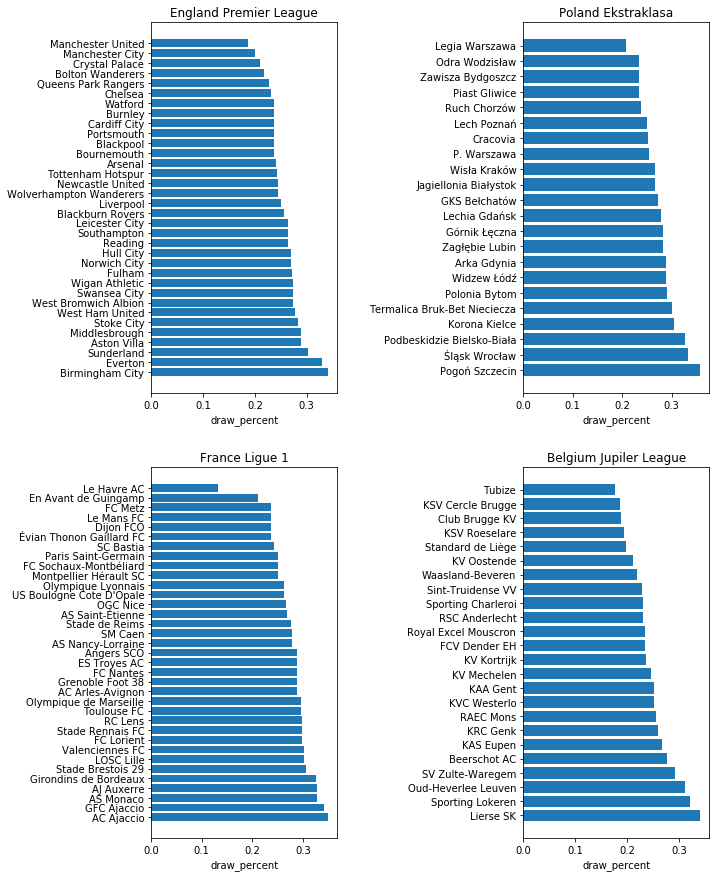

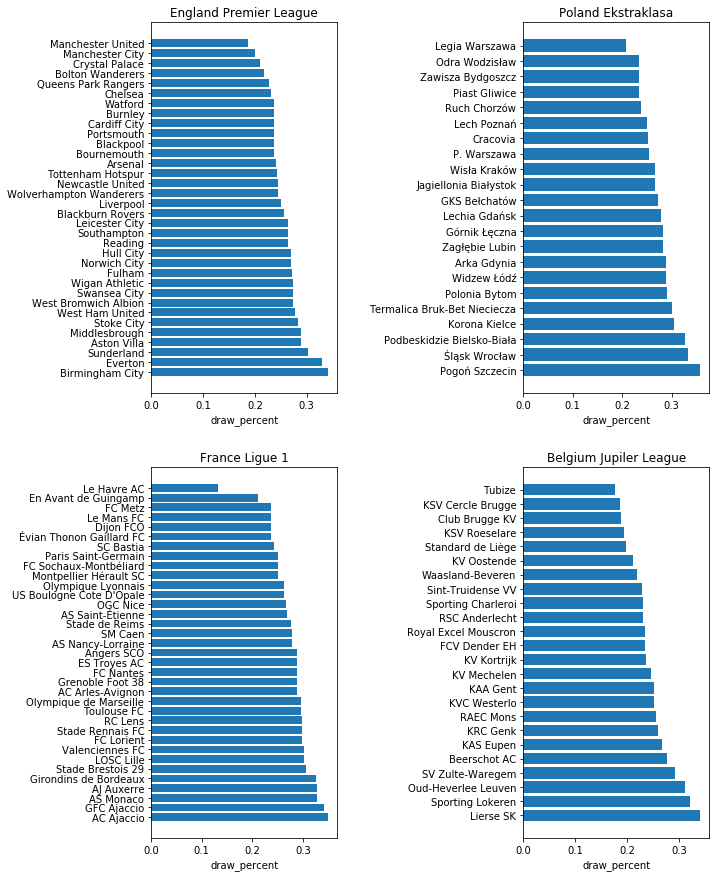

In [12]:
#subsetting our dictionary for plotting draw percent which are signficantly different from EPL

draw_percent_keys = ['England Premier League', 'Poland Ekstraklasa', 'France Ligue 1','Belgium Jupiler League'] 

# Netherlands Eredivisie
# Poland Ekstraklasa
# Spain LIGA BBVA
# France Ligue 
    
league_draw_percent = {}

for name in draw_percent_keys:
    league_draw_percent[name] = df_builder('ROUND(SUM(CAST(draws AS NUMERIC))/SUM(draws + win + loss), 4)',
                                                       'draw_percent', name)

fig, axs = plt.subplots(2, 2, gridspec_kw={'wspace': 1}, figsize=(10, 15), sharex = False)



for ax, data in zip(axs.flatten(), league_draw_percent.values()):
    ax.barh(data['club'], data['draw_percent'])
#     ax.set_xlim(0, 0.38)
    
for ax, name in zip(axs.flatten(), draw_percent_keys):
    ax.set_title(f'{name}')
    ax.set_xlabel('draw_percent')

plt.savefig('draw_percent_difference.png')


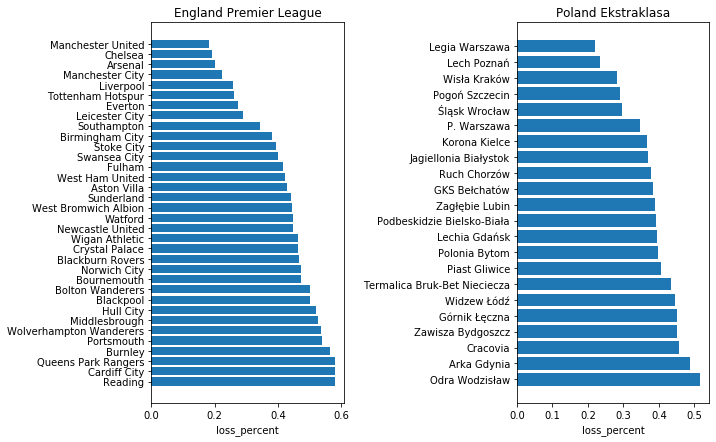

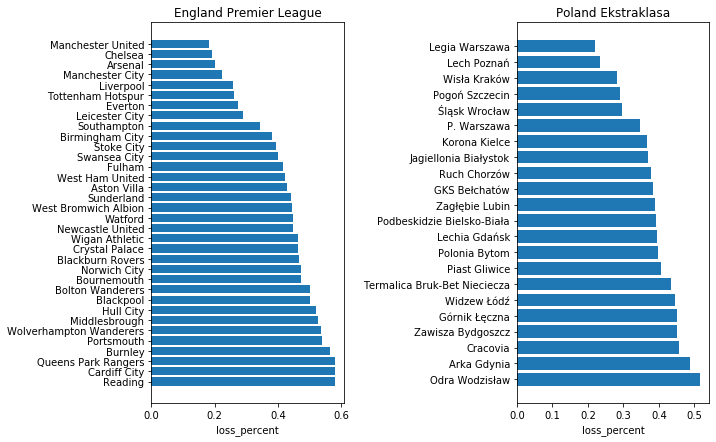

In [13]:
#subsetting our dictionary for plotting loss percent which are signficantly different from EPL

loss_percent_keys = ['England Premier League', 'Poland Ekstraklasa'] 

league_loss_percent = {}

for name in loss_percent_keys:
    league_loss_percent[name] = df_builder('ROUND(SUM(CAST(loss AS NUMERIC))/SUM(draws + win + loss), 4)',
                                                       'loss_percent', name)

fig, axs = plt.subplots(1, 2, gridspec_kw={'wspace': 0.9}, figsize=(10, 7), sharex = False)



for ax, data in zip(axs.flatten(), league_loss_percent.values()):
    ax.barh(data['club'], data['loss_percent'])
#     ax.set_xlim(0, 0.38)
    
for ax, name in zip(axs.flatten(), loss_percent_keys):
    ax.set_title(f'{name}')
    ax.set_xlabel('loss_percent')

plt.savefig('loss_percent.png')

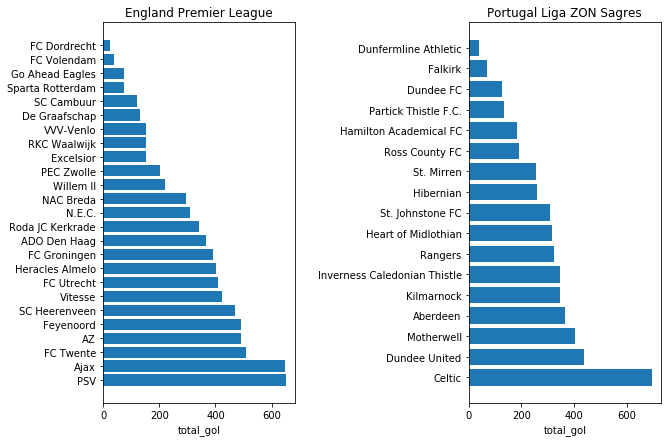

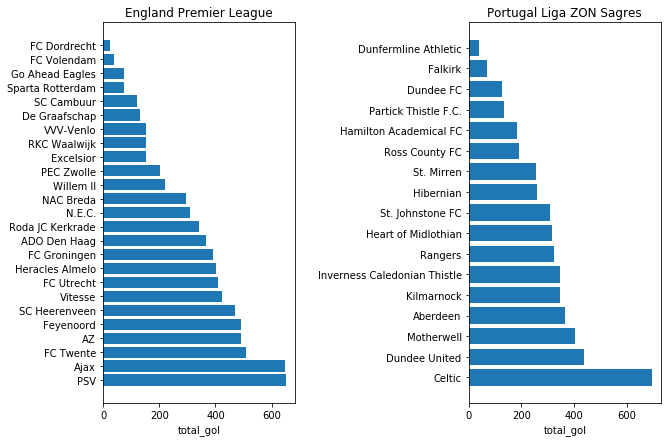

In [14]:
#subsetting our dictionary for total goal which are signficantly different from EPL

total_goal_keys = ['England Premier League', 'Portugal Liga ZON Sagres'] 

league_total_goal = {}

for name in league_names:
    league_total_goal[name] = df_builder('SUM(gol_for)', 'total_gol', name)


fig, axs = plt.subplots(1, 2, gridspec_kw={'wspace': 0.9}, figsize=(10, 7), sharex = False)



for ax, data in zip(axs.flatten(), league_total_goal.values()):
    ax.barh(data['club'], data['total_gol'])
#     ax.set_xlim(0, 0.38)
    
for ax, name in zip(axs.flatten(), total_goal_keys):
    ax.set_title(f'{name}')
    ax.set_xlabel('total_gol')

plt.savefig('toal_goal.png')

In [24]:
epl_df = df_builder('SUM(gol_for)', 'total_gol', 'England Premier League')['total_gol']
laliga_df = df_builder('SUM(gol_for)', 'total_gol', 'Spain LIGA BBVA')['total_gol']

In [21]:
n_bootstraps = 10**4
import numpy as np
def bootstrap(data, n_bootstraps=n_bootstraps):
    """Return array of sample means from bootstrapping n_samples times."""
    output = np.zeros(n_bootstraps)
    n = len(data)
    for i in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, 
                                            size=n,
                                            replace=True)
        output[i] = (bootstrap_sample.sum() / n)
    return output

In [26]:
epl_df_bs = bootstrap(epl_df)
laliga_df_bs = bootstrap(laliga_df)

In [31]:
len(epl_df_bs)


10000

10000

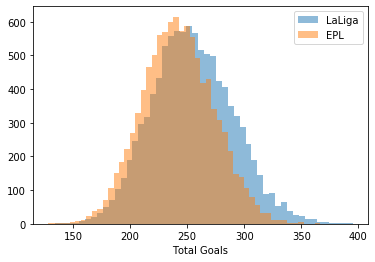

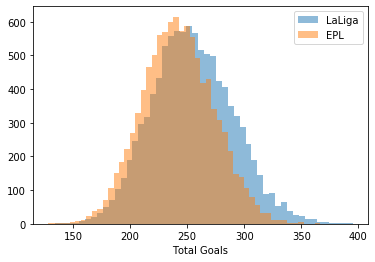

In [29]:
fig, ax = plt.subplots()
ax.hist(laliga_df_bs, alpha=.5, bins=50, label="LaLiga")
ax.hist(epl_df_bs, alpha=.5, bins=50, label="EPL")
ax.legend()
ax.set_xlabel("Total Goals")
plt.show()